In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srn
import plotly

In [ ]:
import numpy as np

In [ ]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [ ]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [ ]:
dados.shape

(10008, 8)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
dados.describe(include='all')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
count,6574,9996,10008,10008.000000,10008.000000,10008.000000,10008.000000,10008
unique,3130,701,1,NaN,NaN,NaN,NaN,1041
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000
freq,24,409,10008,NaN,NaN,NaN,NaN,182
mean,NaN,NaN,NaN,442.300659,3.483114,3.879097,4.097222,NaN
std,NaN,NaN,NaN,7515.379389,1.064200,1.988467,2.824014,NaN
min,NaN,NaN,NaN,10.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,173.000000,3.000000,2.000000,2.000000,NaN
50%,NaN,NaN,NaN,290.000000,3.000000,4.000000,4.000000,NaN
75%,NaN,NaN,NaN,460.250000,4.000000,5.000000,5.000000,NaN


1 - Realizar a média da metragem para cara um dos bairros



In [ ]:
dados.columns

Index(['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor'],
      dtype='object')

In [ ]:
dados.columns = dados.columns.str.lower().str.strip()

In [ ]:
dados.columns

Index(['rua', 'bairro', 'cidade', 'metragem', 'quartos', 'banheiros', 'vagas',
       'valor'],
      dtype='object')

In [ ]:
dados.bairro.value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: bairro, Length: 701, dtype: int64

In [ ]:
colunas = ['bairro', 'metragem']

dados.groupby('bairro')[colunas].mean(numeric_only=True).sort_values(by='metragem', ascending=False)

,metragem
bairro,
Sítio Represa,37000.000000
Vila Castelo,2850.000000
Jardim Guedala,2486.640199
Jardim das Camélias,1700.000000
Chácara Flora,1260.727273
...,...
Cidade Antônio Estevão de Carvalho,57.500000
Jardim Nova Germania,57.000000
Jardim Benfica,48.000000


2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas)

In [ ]:
dados.bairro

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: bairro, Length: 10008, dtype: object

In [ ]:
dados['bairro']

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: bairro, Length: 10008, dtype: object

In [ ]:
dados.get('bairro')

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: bairro, Length: 10008, dtype: object

In [ ]:
dados.loc[:, 'bairro']

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: bairro, Length: 10008, dtype: object

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão

In [ ]:
dados[dados.valor.str.contains('\n                      /Mês')].valor

151      R$ 11.000\n                      /Mês
156      R$ 12.000\n                      /Mês
175      R$ 25.000\n                      /Mês
178      R$ 30.000\n                      /Mês
182      R$ 10.000\n                      /Mês
                         ...                  
9934      R$ 2.200\n                      /Mês
9941      R$ 6.000\n                      /Mês
9970      R$ 2.200\n                      /Mês
9977      R$ 6.000\n                      /Mês
10006     R$ 2.200\n                      /Mês
Name: valor, Length: 848, dtype: object

In [ ]:
def converter(valor):
  # assumindo que está catalogado por dia
  valor = valor.replace('R$ ', '')
  valor = valor.replace('.', '')

  if 'M' in valor or 'A' in valor or 'D' in valor:
      if 'M' in valor:
        valor = valor.replace('\n                      /Mês', '')
        valor = float(valor)
        valor /= 30

      elif 'A' in valor:
        valor = valor.replace('\n                      /Ano', '')
        valor = float(valor)
        valor /= 365

      else:
        valor = valor.replace('\n                      /Dia', '')
        valor = float(valor)
        valor *= 1

  return valor

In [ ]:
dados.valor.apply(lambda x: converter(x))

dados.valor = dados.valor.apply(lambda linha: converter(linha))

In [ ]:
dados.valor = dados.valor.str.replace('R$ ', '', regex=False)
dados.valor = dados.valor.str.replace('.', '', regex=False)
dados.valor.unique()

array(['7000000', '3700000', '380000', '685000', '540000', '1980000',
       '850000', '450000', '199900', '585000', '700000', '15000',
       '2500000', '1700000', '1150000', '550000', '420000', '2232000',
       '2700000', '4190000', '860000', '650000', '490000', '1485000',
       '1100000', '2985000', '3100000', '8700000', '849000', '890000',
       '1650000', '445000', '425000', '500000', '1060000', '3890000',
       '2200000', '1250000', '390000', '1600000', '370000', '130000',
       '545000', '520000', '325000', '409000', '1500000', '5500000',
       '250000', '775000', '13000', '780000', '980000', '750000',
       '1680000', '14500000', '1237000', '950000', '510000', '4240000',
       '2190000', '2180000', '398000', '1390000', '530000', '1280000',
       '6500000', '2900000', '3500000', '670000', '470000', '2400000',
       '1350000', '800000', '630000', '1063830', '1800000', '2950000',
       '37000000', '1200000', '4950000', '920000', '30000000', '940000',
       '6200000', '

In [ ]:
dados.valor = dados.valor.str.replace('\n                      /Mês', '', regex=False)
dados.valor = dados.valor.str.replace('\n                      /Ano', '', regex=False)
dados.valor = dados.valor.str.replace('\n                      /Dia', '', regex=False)

In [ ]:
dados.valor = dados.valor.astype(np.float64)
dados.valor.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10008 entries, 0 to 10007
Series name: valor
Non-Null Count  Dtype  
--------------  -----  
9156 non-null   float64
dtypes: float64(1)
memory usage: 78.3 KB


In [ ]:
dados.banheiros.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10008 entries, 0 to 10007
Series name: banheiros
Non-Null Count  Dtype
--------------  -----
10008 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


<Axes: ylabel='banheiros'>

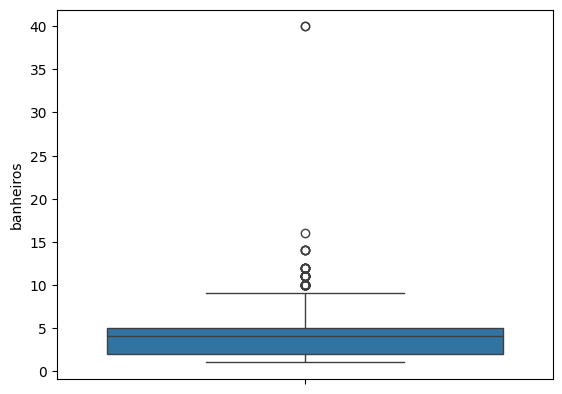

In [ ]:
srn.boxplot(dados.banheiros)

In [ ]:
# conclusão: analisar se esses outliers de banheiros tratam
# de prédios comerciais ou coisa do tipo ou se não outliers mesmo

In [ ]:
colunas = ['bairro', 'valor']

dados[colunas].sort_values(by='valor', ascending=False)

,bairro,valor
400,Jardim Europa,65000000.0
1530,Jardim América,65000000.0
6882,Jardim América,65000000.0
6131,Jardim América,55000000.0
3542,Jardim América,45825000.0
...,...,...
9934,Vila Oratório,NaN
9941,Jardim Petrópolis,NaN
9970,Vila Oratório,NaN
9977,Jardim Petrópolis,NaN


In [ ]:
primeiros_20 = dados[colunas].sort_values(by='valor', ascending=False).iloc[:20]
média_por_bairro = primeiros_20.groupby('bairro')['valor'].mean()
média_por_bairro = pd.DataFrame(média_por_bairro)
média_por_bairro

,valor
bairro,
Jardim América,4.231389e+07
Jardim Europa,4.175000e+07
Jardim Paulista,3.000000e+07
Jardim Petrópolis,3.200000e+07
Vila Morumbi,3.000000e+07


In [ ]:
média_por_bairro.columns

Index(['valor'], dtype='object')

In [ ]:
import plotly.graph_objects as go

go.Figure(data=[go.Pie(labels=média_por_bairro.index, values=média_por_bairro.valor)]).show()

In [ ]:
# média por bairro dos 20 mais caros

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max

In [ ]:
dados.vagas.value_counts()

2     2380
4     2117
3     1564
6     1068
5      879
1      800
8      435
10     282
7      238
12      67
9       57
15      25
14      25
11      14
20      13
16       9
13       6
30       6
25       5
18       5
26       3
24       2
40       2
50       2
38       1
42       1
34       1
23       1
Name: vagas, dtype: int64

In [ ]:
dados.vagas[dados.vagas == 4].value_counts()

4    2117
Name: vagas, dtype: int64

In [ ]:

dados.mean(numeric_only=True)

metragem     4.423007e+02
quartos      3.483114e+00
banheiros    3.879097e+00
vagas        4.097222e+00
valor        3.052203e+06
dtype: float64

In [ ]:
dados.median(numeric_only=True)

metragem         290.0
quartos            3.0
banheiros          4.0
vagas              4.0
valor        1800000.0
dtype: float64

In [ ]:
dados.min(numeric_only=True)

metragem        10.0
quartos          1.0
banheiros        1.0
vagas            1.0
valor        13000.0
dtype: float64

In [ ]:
dados.max(numeric_only=True)

metragem       750000.0
quartos            16.0
banheiros          40.0
vagas              50.0
valor        65000000.0
dtype: float64

5 - Descobrir quais são os bairros que não tem nome de Rua.

In [ ]:
dados.columns

Index(['rua', 'bairro', 'cidade', 'metragem', 'quartos', 'banheiros', 'vagas',
       'valor'],
      dtype='object')

In [ ]:
dados.bairro[dados.bairro.str.contains('Rua') == False]

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: bairro, Length: 9996, dtype: object

6 - Criem uma escala de valores em milhões (De alguma das colunas existentes nos dados)


In [ ]:
dados.columns

Index(['rua', 'bairro', 'cidade', 'metragem', 'quartos', 'banheiros', 'vagas',
       'valor'],
      dtype='object')

In [ ]:
dados.valor.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10008 entries, 0 to 10007
Series name: valor
Non-Null Count  Dtype  
--------------  -----  
9156 non-null   float64
dtypes: float64(1)
memory usage: 78.3 KB


In [ ]:
dados.metragem.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10008 entries, 0 to 10007
Series name: metragem
Non-Null Count  Dtype
--------------  -----
10008 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


In [ ]:
dados['valor_por_metro'] = (dados.valor / dados.metragem) / 1000000

In [ ]:
dados.valor_por_metro

0        0.007000
1        0.007460
2        0.003040
3        0.002210
4        0.005400
           ...   
10003    0.007000
10004    0.003802
10005    0.005122
10006         NaN
10007    0.002213
Name: valor_por_metro, Length: 10008, dtype: float64

In [ ]:
dados.valor_por_metro.fillna(0.0)

0        0.007000
1        0.007460
2        0.003040
3        0.002210
4        0.005400
           ...   
10003    0.007000
10004    0.003802
10005    0.005122
10006    0.000000
10007    0.002213
Name: valor_por_metro, Length: 10008, dtype: float64

7 - Criem um gráfico de histograma com valores legíveis (alterar labels, cores, título, escala)


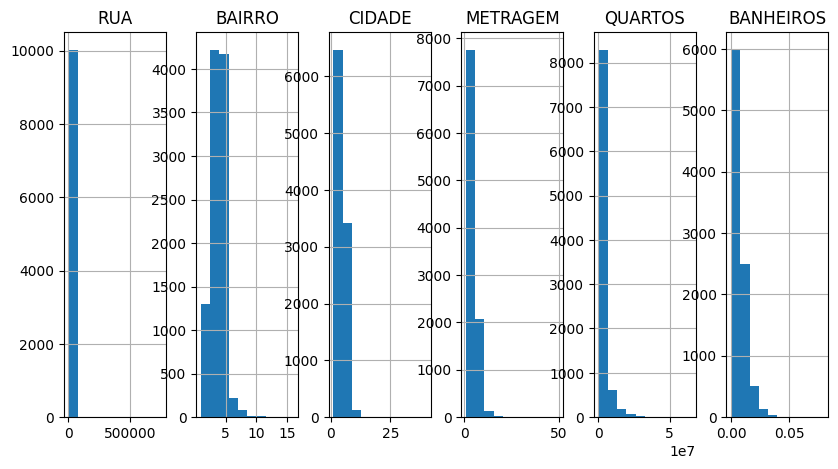

In [ ]:
axes = dados.hist(layout=(1, len(dados.columns)), figsize=(15, 5), bins=10)

for ax, column in zip(axes.flatten(), dados.columns):
  ax.set_title(column.upper())

8 - Faça um gráfico de preço do metro quadrado por bairro.

In [ ]:
dados['valor_por_metro'] = (dados.valor / dados.metragem)

In [ ]:
colunas = ['bairro', 'valor_por_metro']

df_plot = dados.groupby('bairro')[colunas].mean(numeric_only=True)
df_plot

,valor_por_metro
bairro,
Aclimação,7656.169465
Alto da Boa Vista,5849.569011
Alto da Lapa,7606.728080
Alto da Mooca,5691.740133
Alto de Pinheiros,11269.979971
...,...
Vila Água Funda,4467.127995
Água Branca,7269.113912
Água Fria,5841.104428


In [ ]:
df_plot = pd.DataFrame(df_plot)
df_plot

,valor_por_metro
bairro,
Aclimação,7656.169465
Alto da Boa Vista,5849.569011
Alto da Lapa,7606.728080
Alto da Mooca,5691.740133
Alto de Pinheiros,11269.979971
...,...
Vila Água Funda,4467.127995
Água Branca,7269.113912
Água Fria,5841.104428


In [ ]:
df_plot.columns

Index(['valor_por_metro'], dtype='object')

In [ ]:
import plotly.graph_objects as go

go.Figure(data=[go.Bar(x=df_plot.index, y=df_plot['valor_por_metro'])]).show()

9 - Explore as bibliotecas de visualizações e tente fazer alguma correlação com os dados e tire suas  conclusões


10 - Pesquise alguma visualização para analisar os quartis, mediana e outliers existentes na base,

<Axes: ylabel='vagas'>

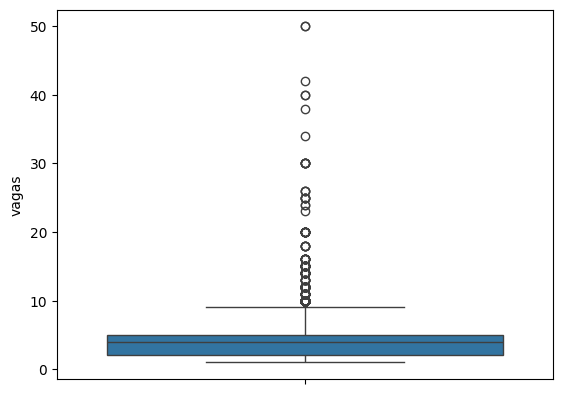

In [ ]:
srn.boxplot(dados.vagas)